# handson5_3.py

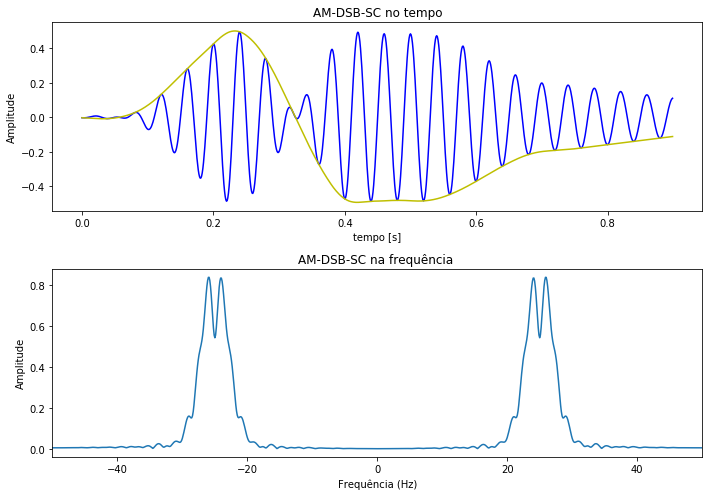

In [1]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
mat_data = loadmat('../../DCO2004_2019/MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
t = mat_data['t'].flatten()
ts =  mat_data['Ts']
msg = mat_data['msg'].flatten()
fs = 1/ts
Ac = 1                                                 # Amplitude da portadora
fc = 25                                                # Frequência da portadora
c = Ac*np.cos(2*np.pi*fc*t)                            # Sinal portadora
s = c*msg                                              # Sinal AM-DSB-SC
# Cálculo do espectro do sinal
lfft = len(s)*10
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(s,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
# Gráfico do sinal no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,s,'b',t,msg,'y')
# Gráfico do espectro do sinal
plt.subplot(212)
plt.title("AM-DSB-SC na frequência ")
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.plot(freq,np.abs(M_sig))
plt.xlim([-50,50])
plt.tight_layout()
plt.show()


# handson5_4.m

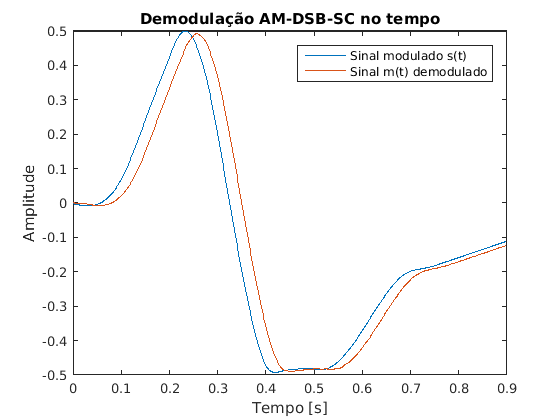

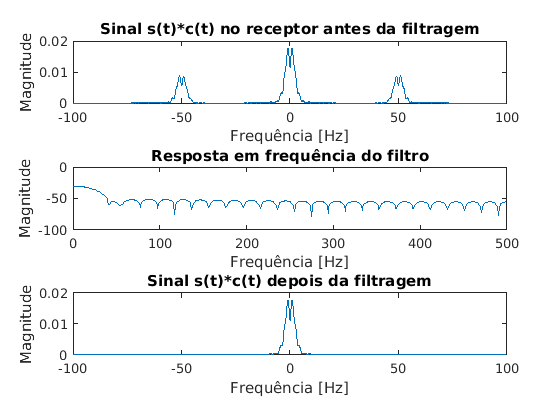

In [5]:
clc; clear all; close all;
load('../../DCO2004_2019/MATERIAL/HD_05/signal.mat')        % Abre o sinal a ser modulado
fs=1/Ts;                                   % Frequência de amostragem
Ac = 1;                                    % Amplitude da portadora
fc = 25;                                   % Frequência da portadora
c = Ac*cos(2*pi*fc*t);                     % Sinal portadora
s = c.*msg;                                % Sinal AM-DSB-SC

% Demodulação AM-DSB-SC
mr = 2*s.*c;

% Filtragem do sinal
B_m = 5;                                     % Banda do sinal
h=fir1(50,[B_m*Ts]);                         % Coeficientes do filtro
mr_filtrado=filter(h,1,mr);                 % Sinal filtrado

% Espectro do sinal antes da filtragem
subplot(3,1,1);
lfft=length(mr)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);          % Eixo de frequência 
Mfft=fft(mr,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                       % Posiciona a FFT no centro
plot (freq ,abs(M_sig));
title('Sinal s(t)*c(t) no receptor antes da filtragem');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-100 100 0 0.02]);                            

% Resposta em frequência do filtro
subplot(3,1,2);
[amp,freq] = freqz(h,fs);
plot(freq*fs/(2*pi),10*log10(abs(amp)));
title('Resposta em frequência do filtro');
ylabel('Magnitude');
xlabel('Frequência [Hz]');

% Espectro do sinal depois da filtragem
subplot(3,1,3);
lfft=length(mr_filtrado)*10;                         % Comprimento da fft (Arbitrário)
freq=(-fs/2:fs/lfft:fs/2-fs/lfft);          % Eixo de frequência 
Mfft=fft(mr_filtrado,lfft)/lfft;                     % Calcula a FFT
M_sig=fftshift(Mfft);                       % Posiciona a FFT no centro
plot (freq ,abs(M_sig));
title('Sinal s(t)*c(t) depois da filtragem');
ylabel('Magnitude');
xlabel('Frequência [Hz]');
axis([-100 100 0 0.02]);

figure;
% Gráfico do sinais modulante e demodulado
plot (t,msg,t,mr_filtrado);
legend('Sinal modulado s(t)','Sinal m(t) demodulado');
title('Demodulação AM-DSB-SC no tempo');
ylabel('Amplitude');
xlabel('Tempo [s]');

In [4]:
x=[4*3]


x =

    12



# handson5_4.py

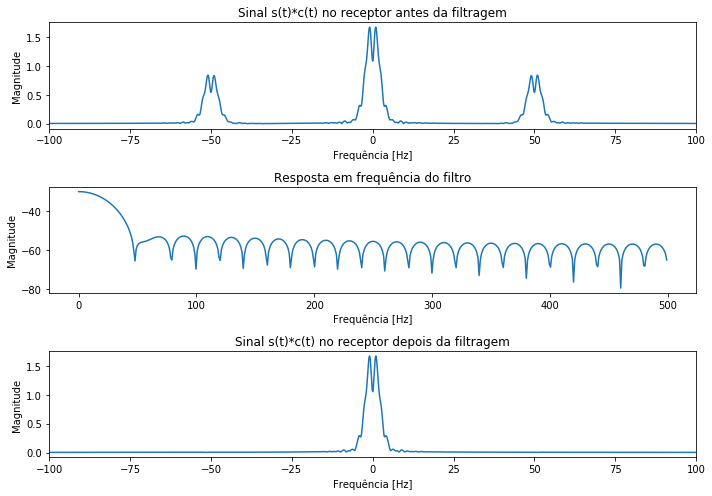

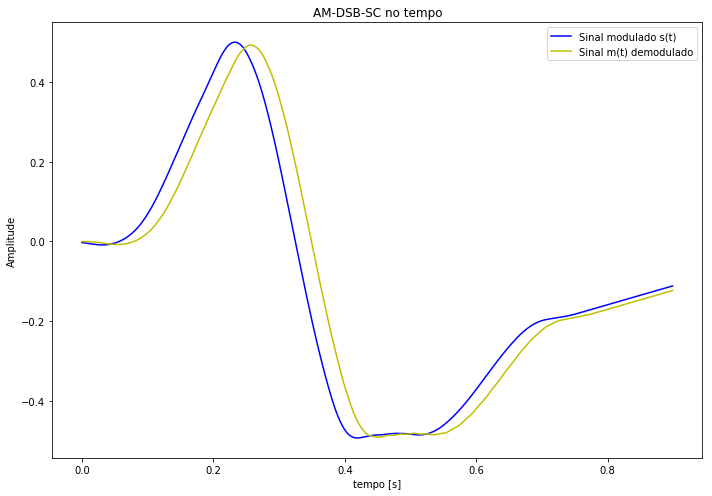

In [2]:
from scipy.io import loadmat
import numpy as np
from scipy import fftpack 
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy import signal

mat_data = loadmat('../../DCO2004_2019/MATERIAL/HD_05/signal.mat')      # Retorna um dicionário
t = mat_data['t'].flatten()
ts =  float(mat_data['Ts'])
msg = mat_data['msg'].flatten()
fs = 1/ts
Ac = 1                                                 # Amplitude da portadora
fc = 25                                                # Frequência da portadora
c = Ac*np.cos(2*np.pi*fc*t)                            # Sinal portadora
s = c*msg                                              # Sinal AM-DSB-SC

# Demodulação AM-DSB-SC
mr = 2*s*c;

# Filtragem do sinal
nyq_rate = fs / 2.0
cutoff_hz = 10                                         # Banda do sinal
h=signal.firwin(50,cutoff_hz/nyq_rate)                 # Coeficientes do filtro
mr_filtrado=signal.lfilter(h,1,mr)                     # Sinal filtrado

# Espectro do sinal antes da filtragem
lfft = len(mr)*10                                      # Comprimento da fft (Arbitrário)
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(mr,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
# Gráfico do sinal no tempo
plt.figure(1,[10,7])
plt.subplot(311)
plt.title("Sinal s(t)*c(t) no receptor antes da filtragem")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq ,abs(M_sig))
plt.xlim([-100,100])

# Resposta em frequência do filtro
plt.subplot(312)
[freq,amp] = freqz(h,fs)
plt.plot(freq*fs/(2*np.pi),10*np.log10(abs(amp)))
plt.title("Resposta em frequência do filtro")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")

# Espectro do sinal depois da filtragem
lfft = len(mr_filtrado)*10                                      # Comprimento da fft (Arbitrário)
freq = np.arange(-fs/2,fs/2,fs/lfft)
M_fft = np.fft.fft(mr_filtrado,n=lfft,axis=0)/np.sqrt(lfft)
M_sig= fftpack.fftshift(M_fft)
plt.subplot(313)
plt.title("Sinal s(t)*c(t) no receptor depois da filtragem")
plt.ylabel("Magnitude")
plt.xlabel("Frequência [Hz]")
plt.plot(freq ,abs(M_sig))
plt.xlim([-100,100])
plt.tight_layout()
plt.show()

# Gráfico do sinais modulante e demodulado
plt.figure(1,[10,7])
plt.title("AM-DSB-SC no tempo")
plt.ylabel("Amplitude")
plt.xlabel("tempo [s]")
plt.plot(t,msg,'b',t,mr_filtrado,'y')
plt.legend(['Sinal modulado s(t)','Sinal m(t) demodulado']);
plt.tight_layout()
plt.show()

In [ ]:
clc; clear all; close all;
%% Determinando os parâmetros da onda
Ts=1e-4;                                                    % Período de amostragem
fs=1/Ts;                                                    % Frequência de amostragem
t = [0:5e3]*Ts;                                             % Definição do vetor tempo
fc = 500;                                                   % Frequência da portadora
fm = 150;                                                   % Frequência do sinal
Am=1;                                                       % Amplitude do sinal senoidal
Ac=1;                                                       % Amplitude da portadora
carrier = Ac*cos(2*pi*fc*t);                                % Sinal portadora
m_t = Am*cos(2*pi*fm*t).*exp(-t*20);                        % Sinal mensagem
lmt = length(m_t);                                          % Comprimento do vetor mensagem
M_t = fftshift(fft(m_t,lmt)/lmt);                           % Sinal na frequência
freq_m = (-fs/2:fs/lmt:fs/2-fs/lmt);                        % Eixo da frequência para M(f)
%% Modulação SSB
% Modulação DSB-SC
x_AM = m_t.*carrier;                                        % Onda Modulada DSB-SC
lfft = length(x_AM);                                        % Comprimento do sinal DSB-SC
lfft = 2^ceil(log2(lfft));                                  % Comprimento do sinal DSB-SC em potência de dois
X_AM = fftshift(fft(x_AM,lfft)/lfft);                       % Onda Modulada AM-DSB-SC na Frequência
freq = (-fs/2:fs/lfft:fs/2-fs/lfft);                        % Eixo da frequência 
L_lsb = floor(fc*Ts*lfft);                                  % Local na frequência que se encontra a LSB.
% Filtragem da LSB
Filt_LSB = ones(1,lfft);                                    % Vetor filtro LSB (degrau) na frequência 
Filt_LSB(lfft/2-L_lsb+1:lfft/2+L_lsb) = zeros(1,2*L_lsb);   % Definindo zeros na LSB
X_SSB_USB = X_AM.*Filt_LSB;                                 % Filtrando a frequência LSB
% Filtragem da USB
Filt_USB = zeros(1,lfft);                                   % Vetor filtro USB na frequência
Filt_USB(lfft/2-L_lsb+1:lfft/2+L_lsb) = ones(1,2*L_lsb);    % Onde tinha 1 agora tem 0
X_SSB_LSB = X_AM.*Filt_USB;                                 % Filtrando a frequência USB

%% Visualização SSB no tempo
% USB tempo
s_ssb_USB = real(ifft(fftshift(X_SSB_USB)));                % Inversa de Fourier
s_ssb_USB = s_ssb_USB (1:lmt);                              % Ajustando o comprimento do vetor
% LSB tempo
s_ssb_LSB = real(ifft(fftshift(X_SSB_LSB)));                % Inversa de Fourier
s_ssb_LSB = s_ssb_LSB (1:lmt);                              % Ajustando o comprimento do vetor

%% Demodulação
% Demodulação SSB-USB
s_dem_USB= s_ssb_USB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Filtro
s_rec_USB=filter(h,1e-4,s_dem_USB);                         % Sinal filtrado
% Espectro do sinal USB filtrado
lfft=length(s_rec_USB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potência de 2
SSB_freq_USB = fftshift(fft(s_rec_USB,lfft)/lfft);          % Sinal recuperado na frequência
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB;            % Amplificando o sinal

% Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB.*carrier*2;                            % Multiplicação com a portadora em fase
B_m=1000;                                                   % Banda para filtragem 
h=fir1(50,[B_m*Ts]);                                        % Filtro
s_rec_LSB=filter(h,1e-4,s_dem_LSB);                         % Sinal filtrado
% Espectro do sinal LSB filtrado
lfft=length(s_rec_LSB);                                     % Comprimento do sinal recuperado
lfft=2^ceil(log2(lfft));                                    % Transformando para uma potência de 2
SSB_freq_LSB = fftshift(fft(s_rec_LSB,lfft)/lfft);          % Sinal recuperado na frequência
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB;            % Amplificando o sinal

%% Gráfico do espectro do Sinal 
% Espectros USB e LSB
subplot(2,1,1);
plot(freq,abs(X_SSB_USB),freq,abs(X_SSB_LSB));
legend('USB','LSB');
title ('Espectro do sinal modulado USB e LSB');
axis([-1e3 1e3 0 0.02]);
% Espectros LSB e m(t)
subplot(2,1,2);
plot(freq_m,abs(M_t),freq, abs(SSB_freq_USB));
title('Espectro do sinal modulante vs sinal demodulado');
legend('m(t)','LSB');
axis([-1e3 1e3 0 0.06]);
%% Gráfico do Sinal no tempo
figure();
% Sinal modulado USB
subplot(2,1,1);
plot(t,s_ssb_USB)
title('Sinal modulado USB')
legend('Sinal USB');
% Sinal m(t) e USB no tempo 
subplot(2,1,2);
plot(t,m_t,t,s_rec_USB);
axis([0 0.1 -2 2]);
title('Sinal modulante vs sinal demodulado - Tempo');
legend('m(t) Gerado','m(t) Demodulado');